In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

In [42]:
def boxplots(datax, ymin, ymax):
    numMetrics = 6
    names = ['umass', 'uci', 'npmi', 'c_a', 'c_p', 'c_v']
    data = datax

    fig, ax1 = plt.subplots(figsize=(18, 15))
    fig.canvas.set_window_title('Boxplot')
    plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.75)

    # Hide these grid behind plot objects
    ax1.set_axisbelow(True)
    ax1.set_title('Comparison of Gibbs metric for 14 and 26 Topics')
    ax1.set_xlabel('Metrics')
    ax1.set_ylabel('Score')

    # Now fill the boxes with desired colors
    boxColors = ['darkkhaki', 'royalblue']
    numBoxes = 2*numMetrics
    medians = list(range(numBoxes))
    for i in range(numBoxes):
        box = bp['boxes'][i]
        boxX = []
        boxY = []
        for j in range(5):
            boxX.append(box.get_xdata()[j])
            boxY.append(box.get_ydata()[j])
        boxCoords = list(zip(boxX, boxY))
        # Alternate between Dark Khaki and Royal Blue
        k = i % 2
        boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
        ax1.add_patch(boxPolygon)
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        medianX = []
        medianY = []
        for j in range(2):
            medianX.append(med.get_xdata()[j])
            medianY.append(med.get_ydata()[j])
            plt.plot(medianX, medianY, 'k')
            medians[i] = medianY[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
                 color='w', marker='*', markeredgecolor='k')

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, numBoxes + 0.5)
    top = ymax
    bottom = ymin
    ax1.set_ylim(bottom, top)
    xtickNames = plt.setp(ax1, xticklabels=np.repeat(names, 2))
    plt.setp(xtickNames, rotation=45, fontsize=12)


    pos = np.arange(numBoxes) + 1
    upperLabels = [str(np.round(s, 2)) for s in medians]
    weights = ['bold', 'semibold']
    for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
        k = tick % 2
        ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
                 horizontalalignment='center', size='medium', weight=weights[k],
                 color=boxColors[k])

    # Finally, add a basic legend
    plt.figtext(0.80, 0.08, '14 Topics',
                backgroundcolor=boxColors[0], color='black', weight='roman',
                size='medium')
    plt.figtext(0.80, 0.045, '26 Topics',
                backgroundcolor=boxColors[1],
                color='white', weight='roman', size='medium')
    plt.figtext(0.80, 0.015, '*', color='white', backgroundcolor='silver',
                weight='roman', size='medium')
    plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
                size='medium')

    plt.show()

## Gibbs

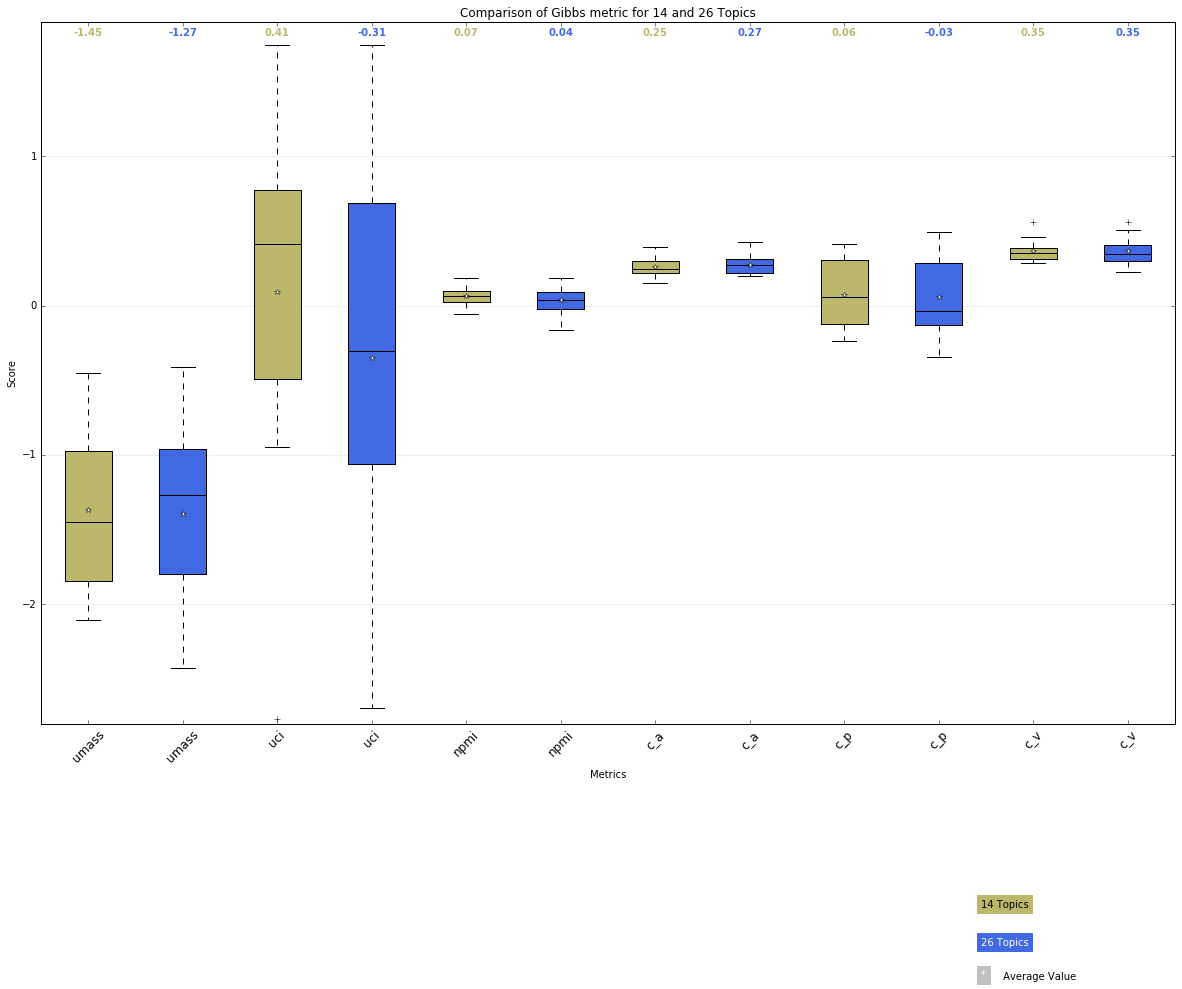

In [43]:
umass_14 = np.array([-1.87876,-0.92453,-1.16395,-1.54442,-1.35865,-0.7594,-1.9022,-0.45177,-2.10271,-1.62407,-1.12305,-1.74006,-0.64239,-1.89598])
uci_14 = np.array([-0.54135,-0.86757,1.74467,0.96091,0.07218,0.33321,-0.3304,0.48908,0.78767,1.02164,0.74093,-0.94797,0.61305,-2.77085])
npmi_14 = np.array([0.10011,-0.00437,0.1841,0.09945,0.01704,0.03621,0.07455,0.04813,0.09221,0.1122,0.11616,-0.01062,0.05996,-0.05859])
c_a_14 = np.array([0.39482,0.24292,0.31268,0.19572,0.14873,0.21497,0.30526,0.29569,0.25113,0.23428,0.2987,0.20242,0.23709,0.26324])
c_p_14 = np.array([0.3573,-0.21237,0.38682,0.16348,-0.1267,-0.11145,0.32912,-0.17503,0.40937,0.2324,-0.2384,0.09566,0.02652,-0.1173])
c_v_14 = np.array([0.45711,0.29132,0.56178,0.36069,0.30624,0.28313,0.44679,0.31256,0.39112,0.37855,0.33856,0.31574,0.36087,0.34314])

umass_26 = np.array([-0.46294,-0.93294,-1.00837,-1.34315,-1.26453,-1.57094,-2.21378,-1.27187,-0.98294,-1.33088,-1.87238,-1.27361,-2.02371,-1.93767,-0.7564,-1.34299,-1.0782,-0.45507,-3.8214,-0.87342,-2.42345,-2.3185,-1.23878,-0.95378,-0.41272,-1.14957])
uci_26 = np.array([-0.76413,0.18294,1.74467,-1.09693,-0.94682,-0.54932,1.34782,-0.42003,0.81749,-0.68678,-0.26095,1.21452,-2.6907,-1.86651,0.50111,-1.11259,-1.13288,0.69895,-5.25432,0.34727,-0.34996,0.80423,-1.37365,0.69972,0.35722,0.6611])
npmi_26 = np.array([-0.03004,0.03737,0.1841,-0.02565,-0.02635,0.12671,0.13083,0.01822,0.09009,0.01103,0.09961,0.14834,-0.05771,-0.02857,0.07033,0.00637,-0.00189,0.08241,-0.16512,0.03309,0.05911,0.09963,-0.04464,0.08651,0.03532,0.07377])
c_a_26 = np.array([0.27141,0.23078,0.31268,0.27169,0.19753,0.42723,0.27785,0.21732,0.22345,0.20821,0.36695,0.31276,0.3049,0.21428,0.26631,0.25233,0.21869,0.3547,0.32967,0.21364,0.32868,0.31974,0.20637,0.23051,0.28233,0.20478])
c_p_26 = np.array([-0.20002,-0.25483,0.38114,-0.34552,-0.16474,0.39258,0.43316,-0.06782,0.03891,0.13519,0.30167,0.34978,0.2233,-0.02199,-0.04799,-0.13018,-0.04761,-0.24423,-0.10172,-0.12388,0.48291,0.49115,-0.17867,0.24668,-0.05044,0.03293])
c_v_26 = np.array([0.22785,0.2976,0.56178,0.34434,0.28179,0.50397,0.39092,0.3099,0.31873,0.32976,0.43672,0.47118,0.36408,0.34638,0.38748,0.30595,0.34489,0.28122,0.47966,0.26612,0.40113,0.40479,0.2949,0.43437,0.29164,0.35353])

data = [umass_14, umass_26, uci_14, uci_26, npmi_14, npmi_26, c_a_14, c_a_26, c_p_14, c_p_26, c_v_14, c_v_26]
boxplots(data, ymin=-2.8, ymax=1.9)

## VEM estimated

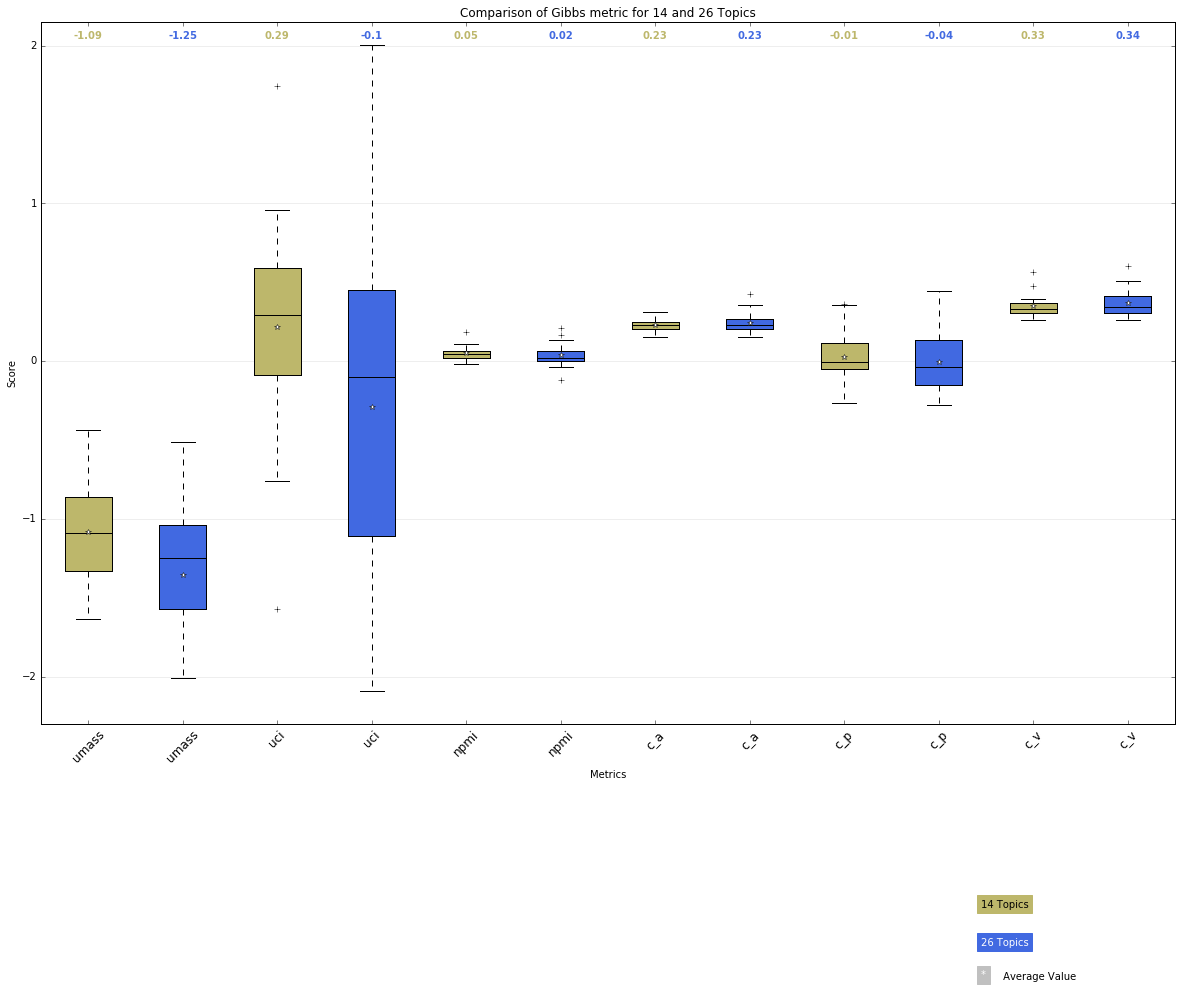

In [46]:
umass_14 = np.array([-1.18529,-1.01574,-1.10502,-1.63674,-1.60315,-1.30012,-0.4403,-0.85787,-1.07916,-1.41252,-1.34452,-0.87721,-0.63876,-0.66089])
uci_14 = np.array([0.32265,0.62795,0.31319,0.24151,-0.75839,0.95755,0.26741,-0.1045,1.74467,-0.04692,-1.57373,0.592,0.58846,-0.14419])
npmi_14 = np.array([0.03531,0.06887,0.04383,0.04943,0.01535,0.10947,0.03901,0.01552,0.1841,0.06254,-0.01635,0.06168,0.06146,0.00844])
c_a_14 = np.array([0.16478,0.20514,0.15014,0.25256,0.20293,0.23638,0.30312,0.16491,0.31268,0.22761,0.23781,0.25146,0.23327,0.21189])
c_p_14 = np.array([-0.15342,-0.01254,0.00914,0.13585,-0.00142,0.35578,-0.26858,0.04057,0.36144,0.16226,-0.03673,-0.12919,-0.05605,-0.01321])
c_v_14 = np.array([0.295,0.30745,0.3274,0.36765,0.36404,0.47408,0.25887,0.29946,0.56178,0.39162,0.34799,0.31154,0.32775,0.26026])

umass_26 = np.array([-1.0322,-1.4835,-1.26279,-1.65375,-2.01126,-3.1668,-0.88433,-0.68366,-1.07134,-0.68694,-1.23013,-0.51511,-1.39855,-1.06734,-1.22923,-1.6009,-1.44229,-2.38672,-1.13804,-0.95329,-1.88974,-1.79763,-1.40585,-0.81797,-1.07808,-1.41999])
uci_26 = np.array([0.2467,0.44844,0.27767,1.26771,-1.85918,-3.58665,0.44692,0.49965,2.00433,-0.53248,-1.13288,0.50951,-0.34504,-1.03774,-1.31374,-1.66804,0.16488,-1.5136,-0.27973,1.15604,-2.09101,0.07189,-0.37708,-0.31802,1.18982,0.16481])
npmi_26 = np.array([0.02673,0.16637,0.0394,0.12776,0.00489,-0.12023,0.06714,0.0544,0.20826,-0.00346,-0.00189,0.05359,0.02594,-0.01759,-0.00973,-0.03313,0.04259,-0.00846,0.01441,0.13383,-0.03605,0.01715,0.01635,0.00758,0.11809,0.10178])
c_a_26 = np.array([0.17787,0.42522,0.1617,0.246,0.2721,0.18884,0.2759,0.22832,0.35222,0.2385,0.21869,0.30793,0.2097,0.22956,0.23673,0.232,0.1889,0.22338,0.20381,0.30235,0.20965,0.1506,0.18858,0.21575,0.24279,0.30702])
c_p_26 = np.array([-0.27973,0.33658,0.19354,0.30977,0.1312,-0.2741,-0.15433,-0.02478,0.44342,-0.28041,-0.04465,-0.19159,-0.12081,-0.01952,-0.0985,-0.01752,-0.04129,0.12846,-0.14256,-0.19807,0.0013,-0.02951,-0.14791,-0.27527,0.38218,0.33106])
c_v_26 = np.array([0.31499,0.50827,0.35742,0.40916,0.45599,0.41176,0.34064,0.27827,0.59911,0.26212,0.34489,0.29042,0.40535,0.30654,0.30149,0.34638,0.33806,0.3847,0.2993,0.33507,0.41891,0.3436,0.29596,0.30593,0.47074,0.46767])

data = np.array([umass_14, umass_26, uci_14, uci_26, npmi_14, npmi_26, c_a_14, c_a_26, c_p_14, c_p_26, c_v_14, c_v_26])
boxplots(data, ymin=-2.3, ymax=2.15)

## VEM Fixed

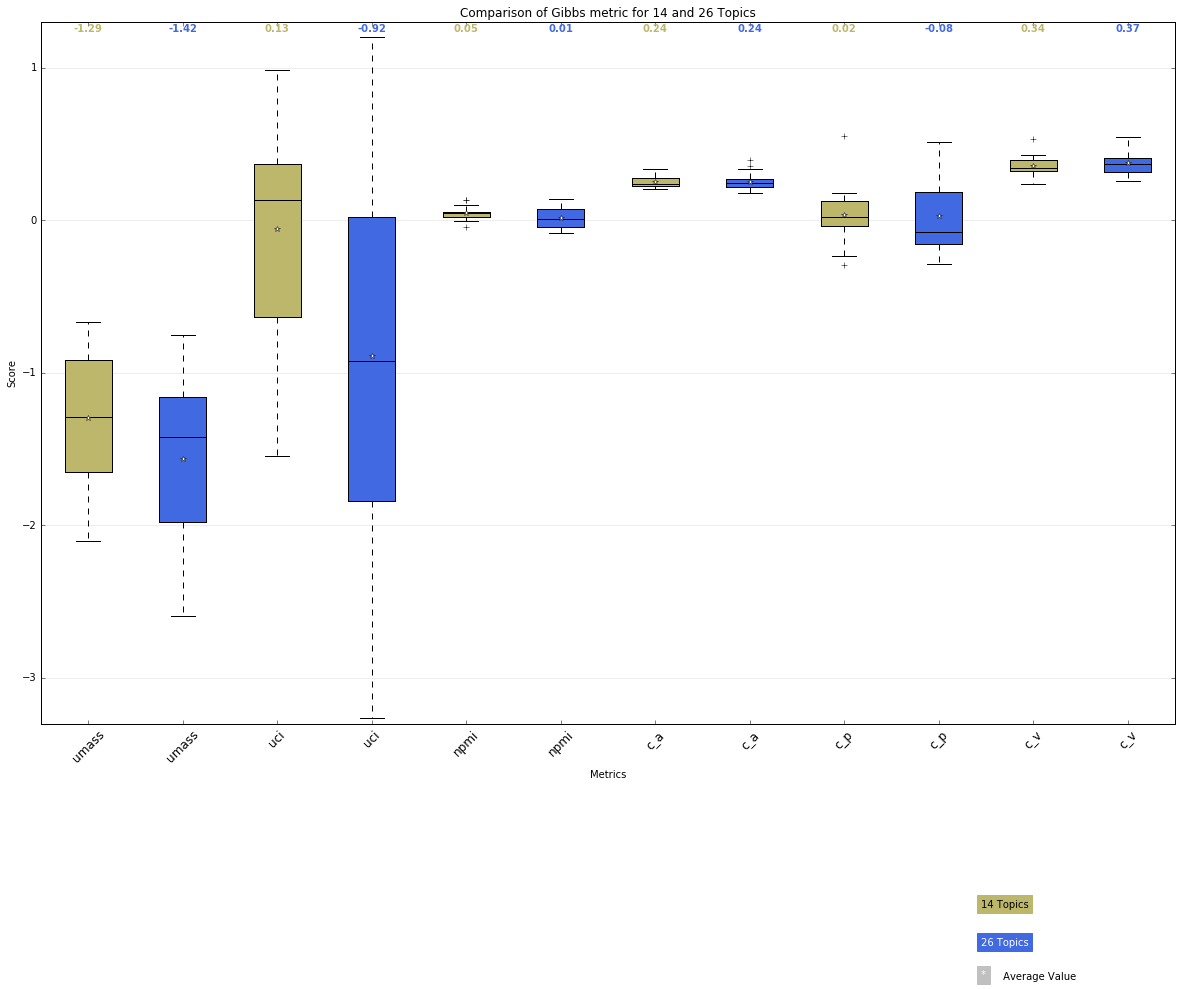

In [56]:
umass_14 = np.array([-0.66427,-1.34611,-2.0918,-1.09029,-2.10431,-1.73701,-1.37618,-0.74708,-0.9983,-1.3712,-1.2332,-0.88854,-0.68564,-1.82949])
uci_14 = np.array([-1.54379,0.94858,-0.73942,0.27514,-0.74067,0.98215,0.71726,0.07033,-0.13096,-0.32349,-1.13288,0.23823,0.39577,0.19805])
npmi_14 = np.array([-0.04225,0.10271,0.02094,0.04941,0.00128,0.12963,0.13243,0.03348,0.05482,0.05602,-0.00189,0.04433,0.03947,0.05338])
c_a_14 = np.array([0.30654,0.22327,0.22055,0.20468,0.28454,0.2845,0.33591,0.24271,0.23096,0.25977,0.21869,0.26096,0.20979,0.23664])
c_p_14 = np.array([-0.29493,-0.01073,0.08782,-0.03613,0.06991,0.55381,-0.03195,0.0492,0.17587,0.13563,-0.02233,-0.13472,-0.23318,0.14836])
c_v_14 = np.array([0.23763,0.33931,0.3719,0.32058,0.35609,0.53067,0.41961,0.28514,0.42953,0.39984,0.34489,0.31939,0.29299,0.34106])

umass_26 = np.array([-1.46626,-1.40655,-1.43234,-1.94869,-2.49425,-0.79465,-0.93217,-1.3595,-1.22482,-1.76461,-1.13399,-0.7518,-2.28053,-2.2198,-2.59283,-1.39085,-1.64235,-2.21443,-1.98527,-0.91223,-2.32661,-1.7254,-1.02877,-0.87408,-1.3264,-1.39872])
uci_26 = np.array([-2.27033,0.90467,-1.12766,0.11369,-2.56234,0.0689,-0.1209,1.20068,-0.40382,-1.88672,-0.71164,0.50111,-1.39199,-0.19578,-1.13207,-1.70967,-1.14788,-1.94807,-2.88122,-1.39182,-3.25861,-2.72391,-0.6303,-0.21206,0.8303,0.95883])
npmi_26 = np.array([-0.05827,0.09685,-0.02805,0.0747,-0.0821,0.00757,0.04056,0.11854,0.08623,-0.05043,0.00088,0.07033,0.00435,0.07469,0.04558,-0.05045,0.08821,-0.03818,-0.06535,-0.02439,-0.05298,-0.08663,-0.00868,0.0154,0.11624,0.13646])
c_a_26 = np.array([0.21109,0.23113,0.17742,0.29257,0.21525,0.21553,0.24347,0.24771,0.30488,0.23914,0.233,0.26631,0.24753,0.33354,0.35574,0.18915,0.3969,0.19939,0.23305,0.26338,0.2718,0.19124,0.2118,0.23611,0.25298,0.30092])
c_p_26 = np.array([-0.18097,0.17289,-0.10668,0.20981,-0.2898,-0.17146,-0.01776,0.26389,0.18533,0.15422,-0.10768,-0.09268,-0.17516,0.42718,0.05917,-0.12,0.34646,-0.09357,0.11759,-0.17166,-0.08572,-0.21849,-0.06876,-0.24016,0.51577,0.3987])
c_v_26 = np.array([0.30469,0.34088,0.28241,0.38579,0.3663,0.25732,0.34953,0.36813,0.54464,0.33213,0.34101,0.38748,0.50096,0.44447,0.39382,0.31074,0.45787,0.36799,0.39737,0.27147,0.41453,0.38062,0.26745,0.30853,0.50535,0.46983])

data = np.array([umass_14, umass_26, uci_14, uci_26, npmi_14, npmi_26, c_a_14, c_a_26, c_p_14, c_p_26, c_v_14, c_v_26])
boxplots(data, ymin=-3.3, ymax=1.3)